In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
from impyute.imputation.cs import fast_knn

dataFile_EO = pd.read_csv('test_data1_WithOutputs.csv')
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS


In [66]:
dataFile_EO = dataFile_EO.drop(['Sr No','Screw Configuration','Experiments','Liq add position','Regime','Beta','d50','Exp Fill level'],axis=1)

imputed_data = fast_knn(dataFile_EO.to_numpy(),k=30)

In [67]:
imputed_data_pd = pd.DataFrame(imputed_data,columns=dataFile_EO.columns)
print(type(imputed_data_pd['MRT']))


<class 'pandas.core.series.Series'>


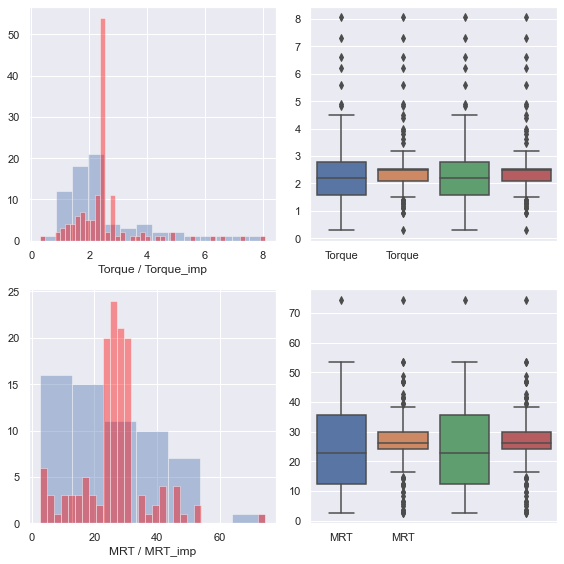

In [68]:
import matplotlib.pyplot as plt
sns.set()
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(8, 8)
for index, variable in enumerate(["Torque","MRT"]):
    sns.distplot(dataFile_EO[variable].dropna(), kde = False, ax = axes[index, 0])
    sns.distplot(imputed_data_pd[variable], kde = False, ax = axes[int(index), 0], color = 'red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    sns.boxplot(data = pd.concat([dataFile_EO[variable], imputed_data_pd[variable]], axis = 1),ax = axes[index, 1])
plt.tight_layout()


In [69]:
from impyute.imputation.cs import mice
imputed_mice_pd = pd.DataFrame(mice(dataFile_EO.to_numpy()),columns=dataFile_EO.columns)
print(imputed_mice_pd.head())

LinAlgError: SVD did not converge in Linear Least Squares